# O2 absorption line in 3D


- author Sylvie Dagoret-Campagne
- date July 26th 2016

In [33]:
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("../templates/matplotlibrc")


%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits


In [77]:
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal
from scipy import ndimage

In [78]:
fitsname='rightwing_img.fits'
object_name='toto'

In [79]:
hdulist = fits.open(fitsname)

In [80]:
hdulist.info()

Filename: rightwing_img.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   (1074, 200)   float64   


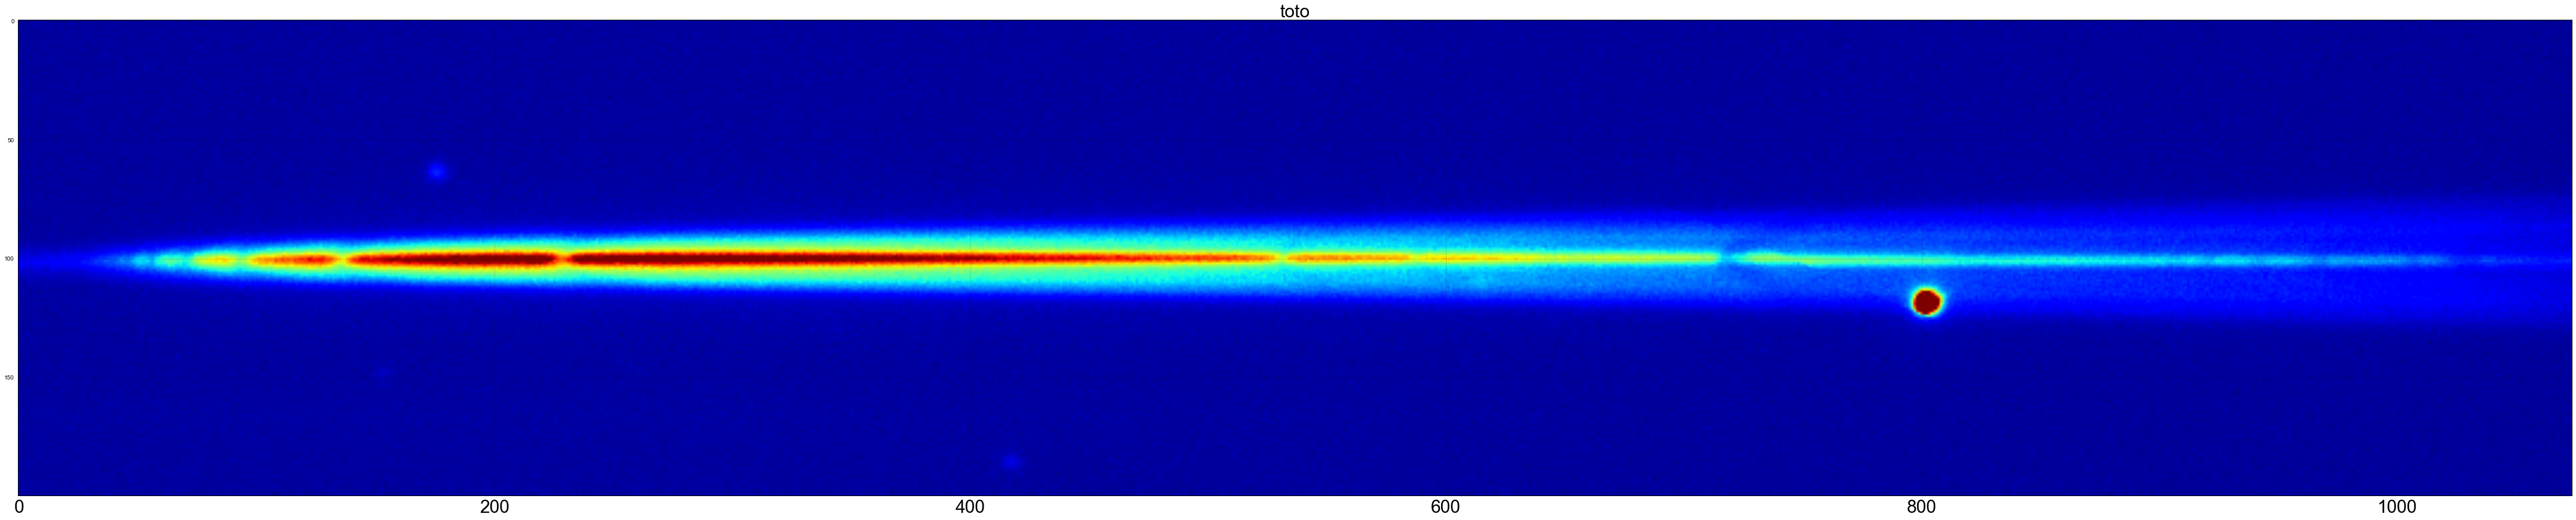

In [81]:

fig, ax = plt.subplots(figsize=(60, 60))
right_wing=hdulist[0].data
ax.imshow(right_wing,vmin=0,vmax=100.)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=10)
ax.grid(True)
plt.title(object_name,fontsize=30)
plt.tight_layout()


In [82]:
extracted_wing=right_wing[75:125,675:780]

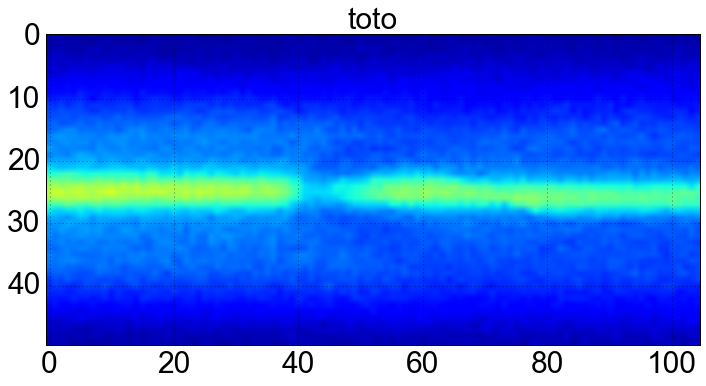

In [83]:
fig, ax = plt.subplots(figsize=(10,6))

ax.imshow(extracted_wing,vmin=0,vmax=100.)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
ax.grid(True)
plt.title(object_name,fontsize=30)
plt.tight_layout()


In [84]:
img=np.copy(extracted_wing)
data_array = ndimage.filters.gaussian_filter(img, 2, mode='nearest')
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )

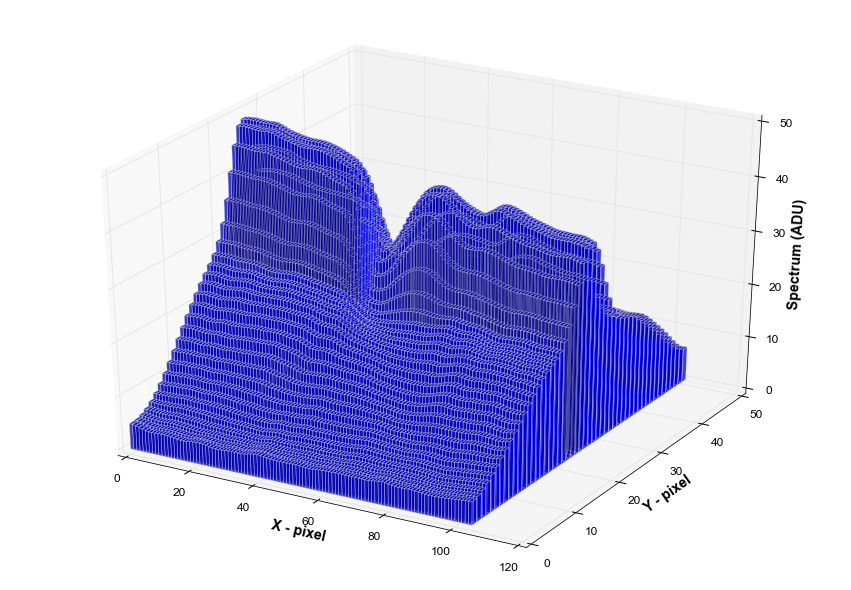

In [86]:
figname='O2_3D.pdf'
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data,color='b', zsort='average' ,alpha=0.5)
#
# Finally, display the plot.
#


ax.set_xlabel('X - pixel ')
ax.set_ylabel('Y - pixel ')
ax.set_zlabel('Spectrum (ADU)')
plt.savefig(figname)
plt.show()

